In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
os.chdir('../code')
from em_alg import EmAlgorithm, StochasticEmAlgorithm, EmBivariateNormal
from scipy.stats import norm, multinomial, multivariate_normal

In [2]:
df = pd.read_csv('../data/galaxies.csv')
df.columns = ['galaxy', 'velocities']

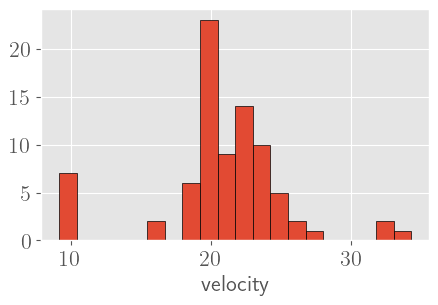

In [3]:
plt.figure(figsize=(5, 3))
plt.hist(df['velocities'], edgecolor='black', bins=20)
plt.xlabel('velocity');

  8%|█████████████▉                                                                                                                                                                            | 150/1999 [00:00<00:02, 889.72it/s]


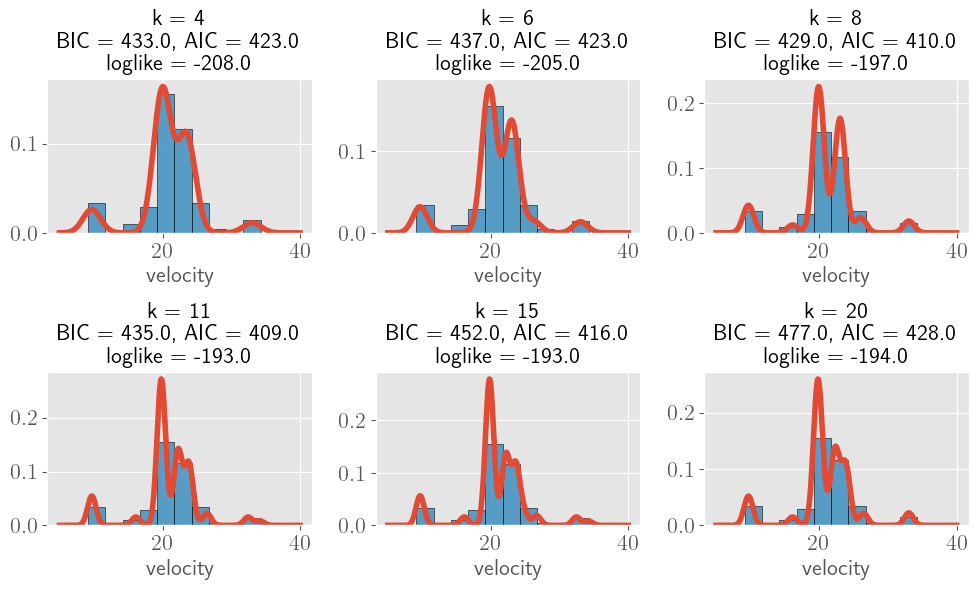

In [4]:
ks = [4,6,8,11,15,20]
x = np.linspace(5, 40, 1000)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
#np.random.seed(1)
for i, k in enumerate(ks):
    em = EmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=True, k=k, max_iter=2000, tol=1e-40)
    params = em.fit()
    pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
    aic = np.round(2*k - 2*params['loglike'])
    bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
    axes[i].plot(x, pdf)
    axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
    axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
    axes[i].set_xlabel('velocity')
    gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
fig.tight_layout() 
#plt.savefig('../figures/galaxies_1.png', dpi=300)

  0%|                                                                                                                                                                                                     | 0/9999 [00:00<?, ?it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|                                                                                                                                                                                                     | 0/9999 [00:00<?, ?it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: R

KeyboardInterrupt: 

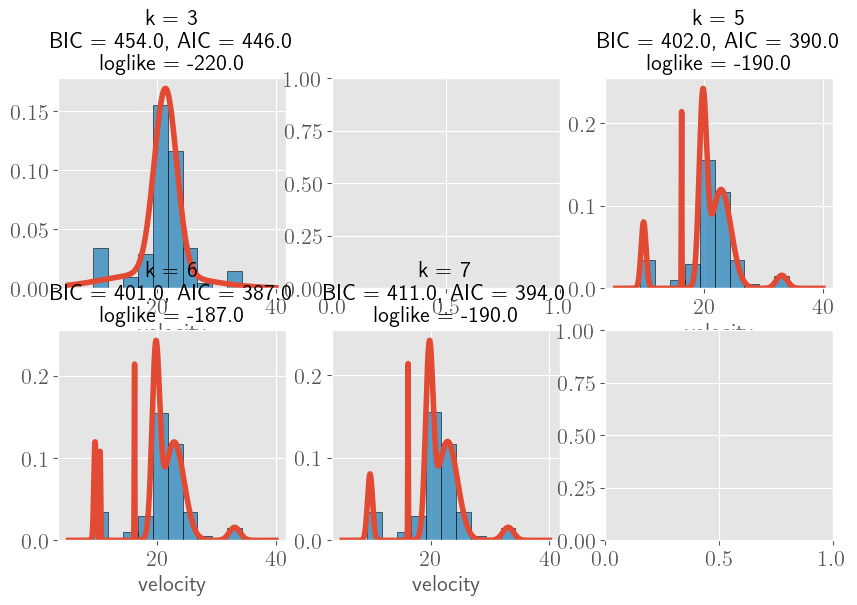

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
ks = [3,4,5,6,7,8]
x = np.linspace(5, 40, 1000)
#np.random.seed(1234)
for i, k in enumerate(ks):
    em = EmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=False, n_wait=10, k=k, max_iter=10000, tol=1e-6)
    params = em.fit()
    try:
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
        gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
    except:
        pass
    
fig.tight_layout() 
#plt.savefig('../figures/galaxies_2.png', dpi=300)

In [ ]:
ks = [4,6,8,11,15,20]
x = np.linspace(5, 40, 1000)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
#np.random.seed(5050)
for i, k in enumerate(ks):
    try:
        em = StochasticEmAlgorithm(y=df['velocities'].to_numpy(), n_wait=0, pooled_sigma=True, k=k, max_iter=5000, tol=1e-99)
        params = em.fit()
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
    except:
        pass
fig.tight_layout() 
#plt.savefig('../figures/galaxies_3.png', dpi=300)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
ks = [3,4,5,6,7,8]
x = np.linspace(5, 40, 1000)
#i = int(np.random.uniform(0, 1000))
#np.random.seed(i)
#print(i)
for i, k in enumerate(ks):
    em = StochasticEmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=False, n_wait=10, k=k, max_iter=10000, tol=1e-5)
    try:
        params = em.fit()
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
        gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
    except:
        pass
    
fig.tight_layout() 
#plt.savefig('../figures/galaxies_4.png', dpi=300)

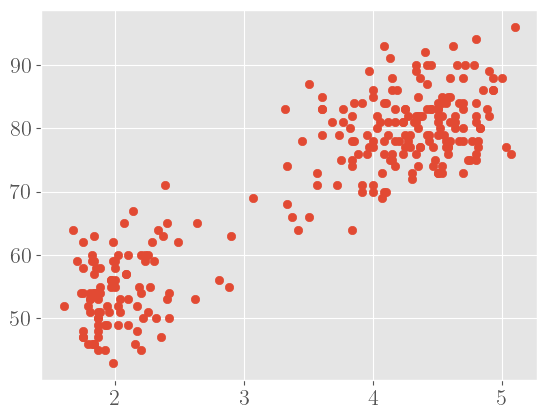

In [3]:
np.random.seed(1111)
df = pd.read_csv('../data/faithful.csv')
data = df[['eruptions', 'waiting']].to_numpy()
#df.columns = ['galaxy', 'velocities']
plt.scatter(df['eruptions'], df['waiting'])

In [26]:
def calculate_pdf(data, em, n_points=100):
    x = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), n_points)
    y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), n_points)
    xx, yy = np.meshgrid(x, y)
    xx, yy = xx.flatten(), yy.flatten()
    xy = np.vstack([xx, yy]).T
    pdfs = [em.weights[k] * multivariate_normal.pdf(xy, mean=em.means[k, :], cov=em.covs[k], allow_singular=True) for k in range(em.k)]
    return x, y, np.sum(pdfs, axis=0)


  1%|██▌                                                                                                                                                                                        | 28/2000 [00:00<00:02, 801.65it/s]


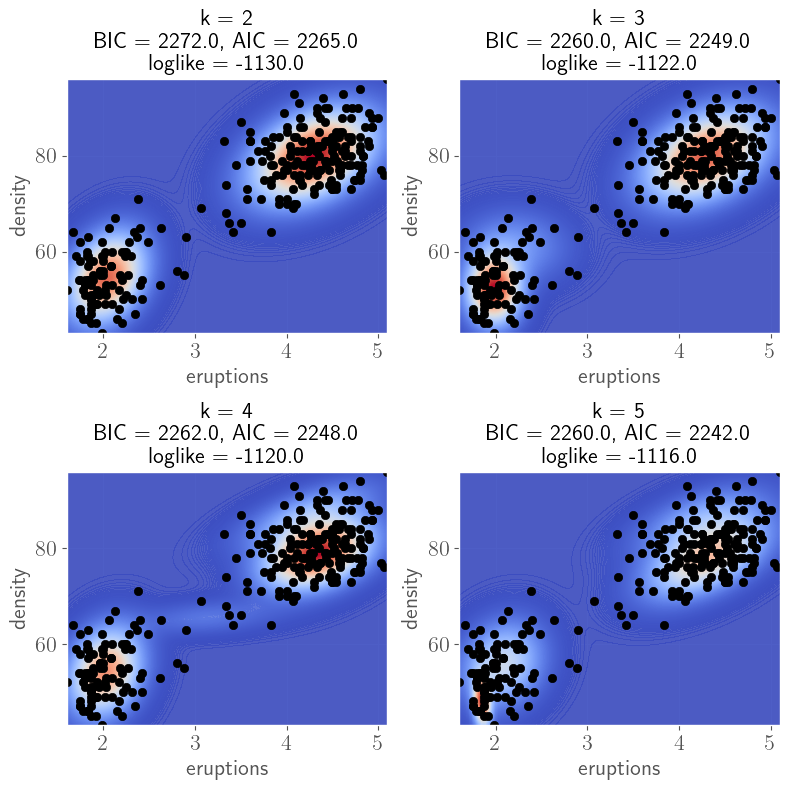

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()
ks = [2,3,4,5]
seeds = [417, 46664, 39535, 70948]
for i, k in enumerate(ks):
    np.random.seed(seeds[i])
    em = EmBivariateNormal(data, k=k, max_iter=2000)
    em.fit()
    x, y, density = calculate_pdf(data, em)
    density = density.reshape(100, 100)
    axes[i].contourf(x, y, density, cmap='coolwarm', levels=1000, alpha=.9)
    axes[i].scatter(df['eruptions'], df['waiting'], color='black')
    axes[i].set_xlabel('eruptions')
    axes[i].set_ylabel('density')

    aic = np.round(2*em.k - 2*em.log_likes[-1])
    bic = np.round(em.k * np.log(data.shape[0]) - 2*em.log_likes[-1])
    axes[i].set_title(f'k = {em.k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(em.log_likes[-1])}')
    
    #plt.savefig('../figures/bivariate.png', dpi=300, bbox_inches='tight')
fig.tight_layout()

In [28]:
x, y, density = calculate_pdf(data, em)
density = density.reshape(100, 100)

plt.contourf(x, y, density, cmap='coolwarm', levels=1000, alpha=.9)
plt.scatter(df['eruptions'], df['waiting'], color='black')
plt.xlabel('eruptions')
plt.ylabel('density')

aic = np.round(2*em.k - 2*em.log_likes[-1])
bic = np.round(em.k * np.log(len(data) - 2*em.log_likes[-1]))
plt.title(f'k = {em.k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
plt.savefig('../figures/bivariate.png', dpi=300, bbox_inches='tight')

ValueError: array must not contain infs or NaNs

  0%|                                                                                                                                                                                            | 1/2000 [00:00<00:07, 269.04it/s]


ValueError: array must not contain infs or NaNs

In [ ]:
data.shape

In [ ]:
10000

In [ ]:
100 * 100


In [ ]:
def d():
    draw = np.random.choice([0, 1], p=[.99, .01])
    if draw == 1:
        return draw
    else:
        return d()

In [ ]:
d()

In [ ]:
multivariate_normal(np.array([1]), np.array([1])).rvs()

In [ ]:
means = np.ones((2))
covs = np.ones((2, 2))

In [ ]:
np.repeat(np.diag(np.ones(2)), 5, axis=1).shape

In [ ]:
np.diag(np.ones(2)).shape

In [ ]:
n = 2
a = np.broadcast_to(np.identity(n), (100, 5, n, n)).reshape(100, n, n, 5)
a[0] = np.ones((2, 2, 5))

In [ ]:
[np.random.choice(3,4)]

In [ ]:
np.matmul(a, a.T)

In [ ]:
a.shape

In [ ]:
a.T.shape

In [ ]:
a = np.ones((5, 2, 3, 4))

In [ ]:
a[0] = np.ones((2, 3, 4))

In [ ]:
a